<a href="https://colab.research.google.com/github/aleksejalex/PyPEF_internal/blob/main/ELLS_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELLS - Practical Introduction into Programming with Python

<a href="https://pef.czu.cz/en/"><img src="https://aleksejalex.4fan.cz/ells/temp_banner.jpeg?22" alt="banner" width="1000"></a>





[GitHub Repository](https://github.com/)

[Project's website](https://kii.pef.czu.cz/ells-2024)

Plan for this lecture:
 - practice regression examples using python

## Exercise 1:
**Task**: Upload the data and examinate the first 5 rows of the dataset.
```
URL to dataset: https://gist.githubusercontent.com/Alzpeta/c34c4959c7a10f7c70c0c93d102a4646/raw/41a9f1bbaae4a48cad668e7044f763c77a992116/gistfile3.txt
```

In [1]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/Alzpeta/c34c4959c7a10f7c70c0c93d102a4646/raw/41a9f1bbaae4a48cad668e7044f763c77a992116/gistfile3.txt')
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Exercise 2:
**Task**: Find out whether the variable "Hours Studied" or "Sleep Hours" has

*   larger mean
*   larger standard deviation

**Task**: What was the highest and lowest Performance Index. Construct a histogram plot for this variable


In [2]:
hours_studied = df["Hours Studied"]
sleep_hours = df["Sleep Hours"]
performance_index = df["Performance Index"]

In [3]:
import numpy as np
mean_hours_studied = np.mean(hours_studied)
print(mean_hours_studied)

mean_sleep_hours = np.mean(sleep_hours)
print(mean_sleep_hours)

4.9929
6.5306


In [4]:
std_hours_studied = np.std(hours_studied)
print(std_hours_studied)

std_sleep_hours = np.std(sleep_hours)
print(std_sleep_hours)

2.5891793275090085
1.6957781812489507


In [5]:
min_performance_index = np.min(performance_index)
print(min_performance_index)

max_performance_index = np.max(performance_index)
print(max_performance_index)

10.0
100.0


Text(0, 0.5, 'Frequency')

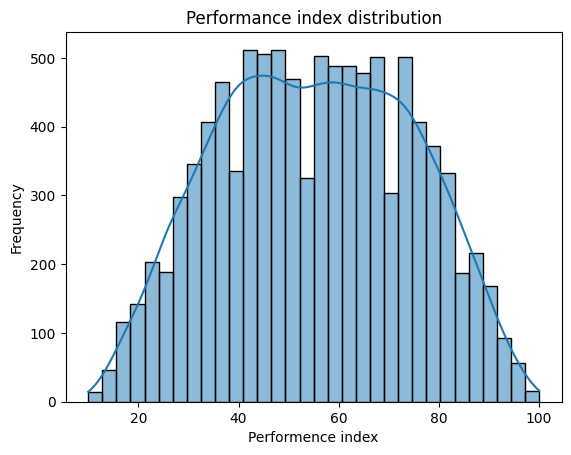

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(performance_index, kde=True)
plt.title('Performance index distribution')
plt.xlabel('Performence index')
plt.ylabel('Frequency')

## Exercise 3
**Task**: Find the linear regression equation for the variables performance index and previous scores.The variable **previous scores** is the independent variable ($X$) and the variable **performance index** is the dependent variable ($Y$)


1.   Use a scatter plot to plot the relationship between these variables and determine whether a linear regression is appropriate here
2.   Use the NumPy library to specify the intercept and the slope
3. Find out what the performence index would be if the previous score was **67**



Text(0.5, 1.0, 'Previous Scores vs. Performance Index')

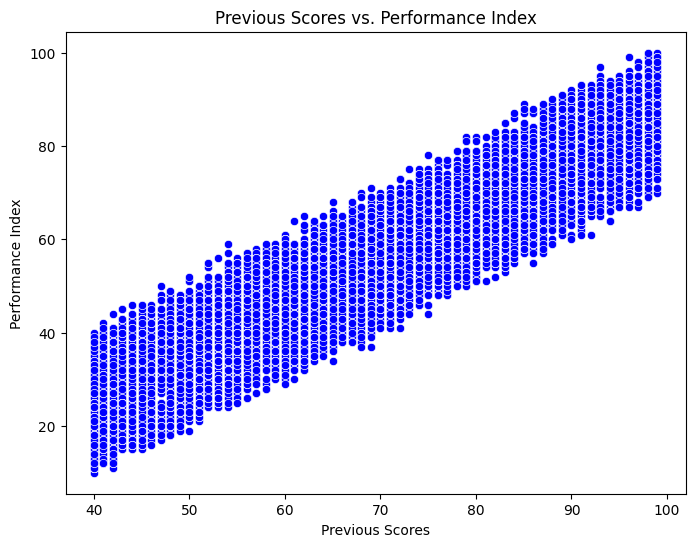

In [7]:

previsous_scores = df["Previous Scores"]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=previsous_scores, y=performance_index, color='blue')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs. Performance Index')



In [8]:
slope, intercept = np.polyfit(previsous_scores, performance_index, 1)
print("slope:", slope)
print("intercept:", intercept)

slope: 1.0138367015830554
intercept: -15.181799427126386


In [9]:
new_previsous_score= 67
predicted_performance_index = intercept + slope*new_previsous_score
print(predicted_performance_index)

52.745259578938324


## Exercise 4
**Task**: Calculate again the linear regression, this time using the Stastmodels library.

In [10]:
import statsmodels.api as sm

X = sm.add_constant(previsous_scores)

model = sm.OLS(performance_index, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 5.156e+04
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:46:11   Log-Likelihood:                -34657.
No. Observations:               10000   AIC:                         6.932e+04
Df Residuals:                    9998   BIC:                         6.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.1818      0.320    -

## Exercise 5

**Task**: there is one variable in the dataset that is not numeric. Convert it into numerical form so it can be use for calculations


<details>
    <summary>Hint</summary>
    <i>The Extracurricular Activities variable has only two options - Yes / No. For example, you can use 1 to represent "Yes" and 0 to represent "No". Due to the high number of records in the dataset, do not do this conversion manually, but try to use some loop</i>
</details>






In [11]:
extracurricular_activities = df["Extracurricular Activities"]
converted_extracurricular_activities = []
for i in extracurricular_activities:
  if i == 'Yes':
    converted_extracurricular_activities.append(1)
  else:
    converted_extracurricular_activities.append(0)


## Exercise 6

**Task**: Perform a multiple regression. The dependent variable is still the **Performance Index**. Add the variables **Extracurricular Activities** and **Sample Question Papers Practiced** to the independent variable **Previous Scores**.
Compare how the coefficient of determination changes from the previous simple linear regression

In [12]:
sample_question_practiced = df['Sample Question Papers Practiced']

In [13]:
import statsmodels.api as sm

X = np.column_stack((sample_question_practiced, converted_extracurricular_activities, previsous_scores))
X = sm.add_constant(X)

model = sm.OLS(performance_index, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.738e+04
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:46:20   Log-Likelihood:                -34608.
No. Observations:               10000   AIC:                         6.922e+04
Df Residuals:                    9996   BIC:                         6.925e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.5619      0.348    -47.619      0.0

## Exercise 7
**Task**: From the table in Exercise 6, read all the parameters needed for the regression equation. Predict the variable Performence Index if


*   Sample Question Papers Practiced = 10
*   Previsou Score = 67
*   Extracurricular Activities = Yes

Compare this prediction with the prediction from exercise 3, where only the previous score influenced the performance pndex





In [14]:
new_previsous_score= 67
new_sample_question_practiced = 10
new_extracurricular_activities = 1
predicted_performance_index = -16.5619 + 0.2401*new_sample_question_practiced + 0.6302*new_extracurricular_activities + 1.0134*new_previsous_score
print(predicted_performance_index)

54.3671


<div style="font-style: italic; font-size: 14px;">
    <p>This material was prepared by Department of Information Engineering (<a href="https://www.pef.czu.cz/en">PEF ČZU</a>) exclusively for purposes of ELLS summer school "Practical Introduction into Programming with Python". Any distribution or reproduction of this material, in whole or in part, without prior written consent of the authors is prohibited.</p>
    <p>This material is shared under the <b>Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International Public License</b>, <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link</a>.</p>
</div>
